In [1]:
!nvidia-smi

Wed Jun 12 23:57:29 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.99                 Driver Version: 555.99         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090      WDDM  |   00000000:29:00.0  On |                  N/A |
|  0%   34C    P8             18W /  350W |     999MiB /  24576MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
#!pip install ultralytics==8.0.196
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
#!pip install roboflow 

In [2]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


# Import Model

In [3]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO("yolov8n.pt").to(device)

# Run Inference to see if the model is loaded.

In [ ]:
#add the path of the image
source='ronaldo.jpg'

# Run inference on 'bus.jpg' with arguments
model.predict(source, save=True, conf=0.5)

# Download Dataset

In [4]:
import os

## First, go to folder, then assign it to HOME
HOME = os.getcwd()
print(HOME)

C:\Users\royce\Downloads


In [ ]:
# Make dataset folder 
dataset_path = f"{HOME}/datasets"

if not os.path.exists(dataset_path):
    os.mkdir(dataset_path)

In [ ]:
%cd {HOME}/datasets

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")

#Source of the dataset
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(9)
dataset = version.download("yolov8")

# Training of the model

In [ ]:
#specify the relative path of where the dataset is saved
%cd {HOME}/datasets

In [ ]:
# Train the model with 1 GPUs
results = model.train(data='data.yaml', epochs=25, imgsz=640, device=[0], batch=2,  plots=True)

# Check Training Results

In [9]:
from IPython.display import display, Image

#Path to the best model weights
%cd {HOME}/datasets/runs/detect/train7/

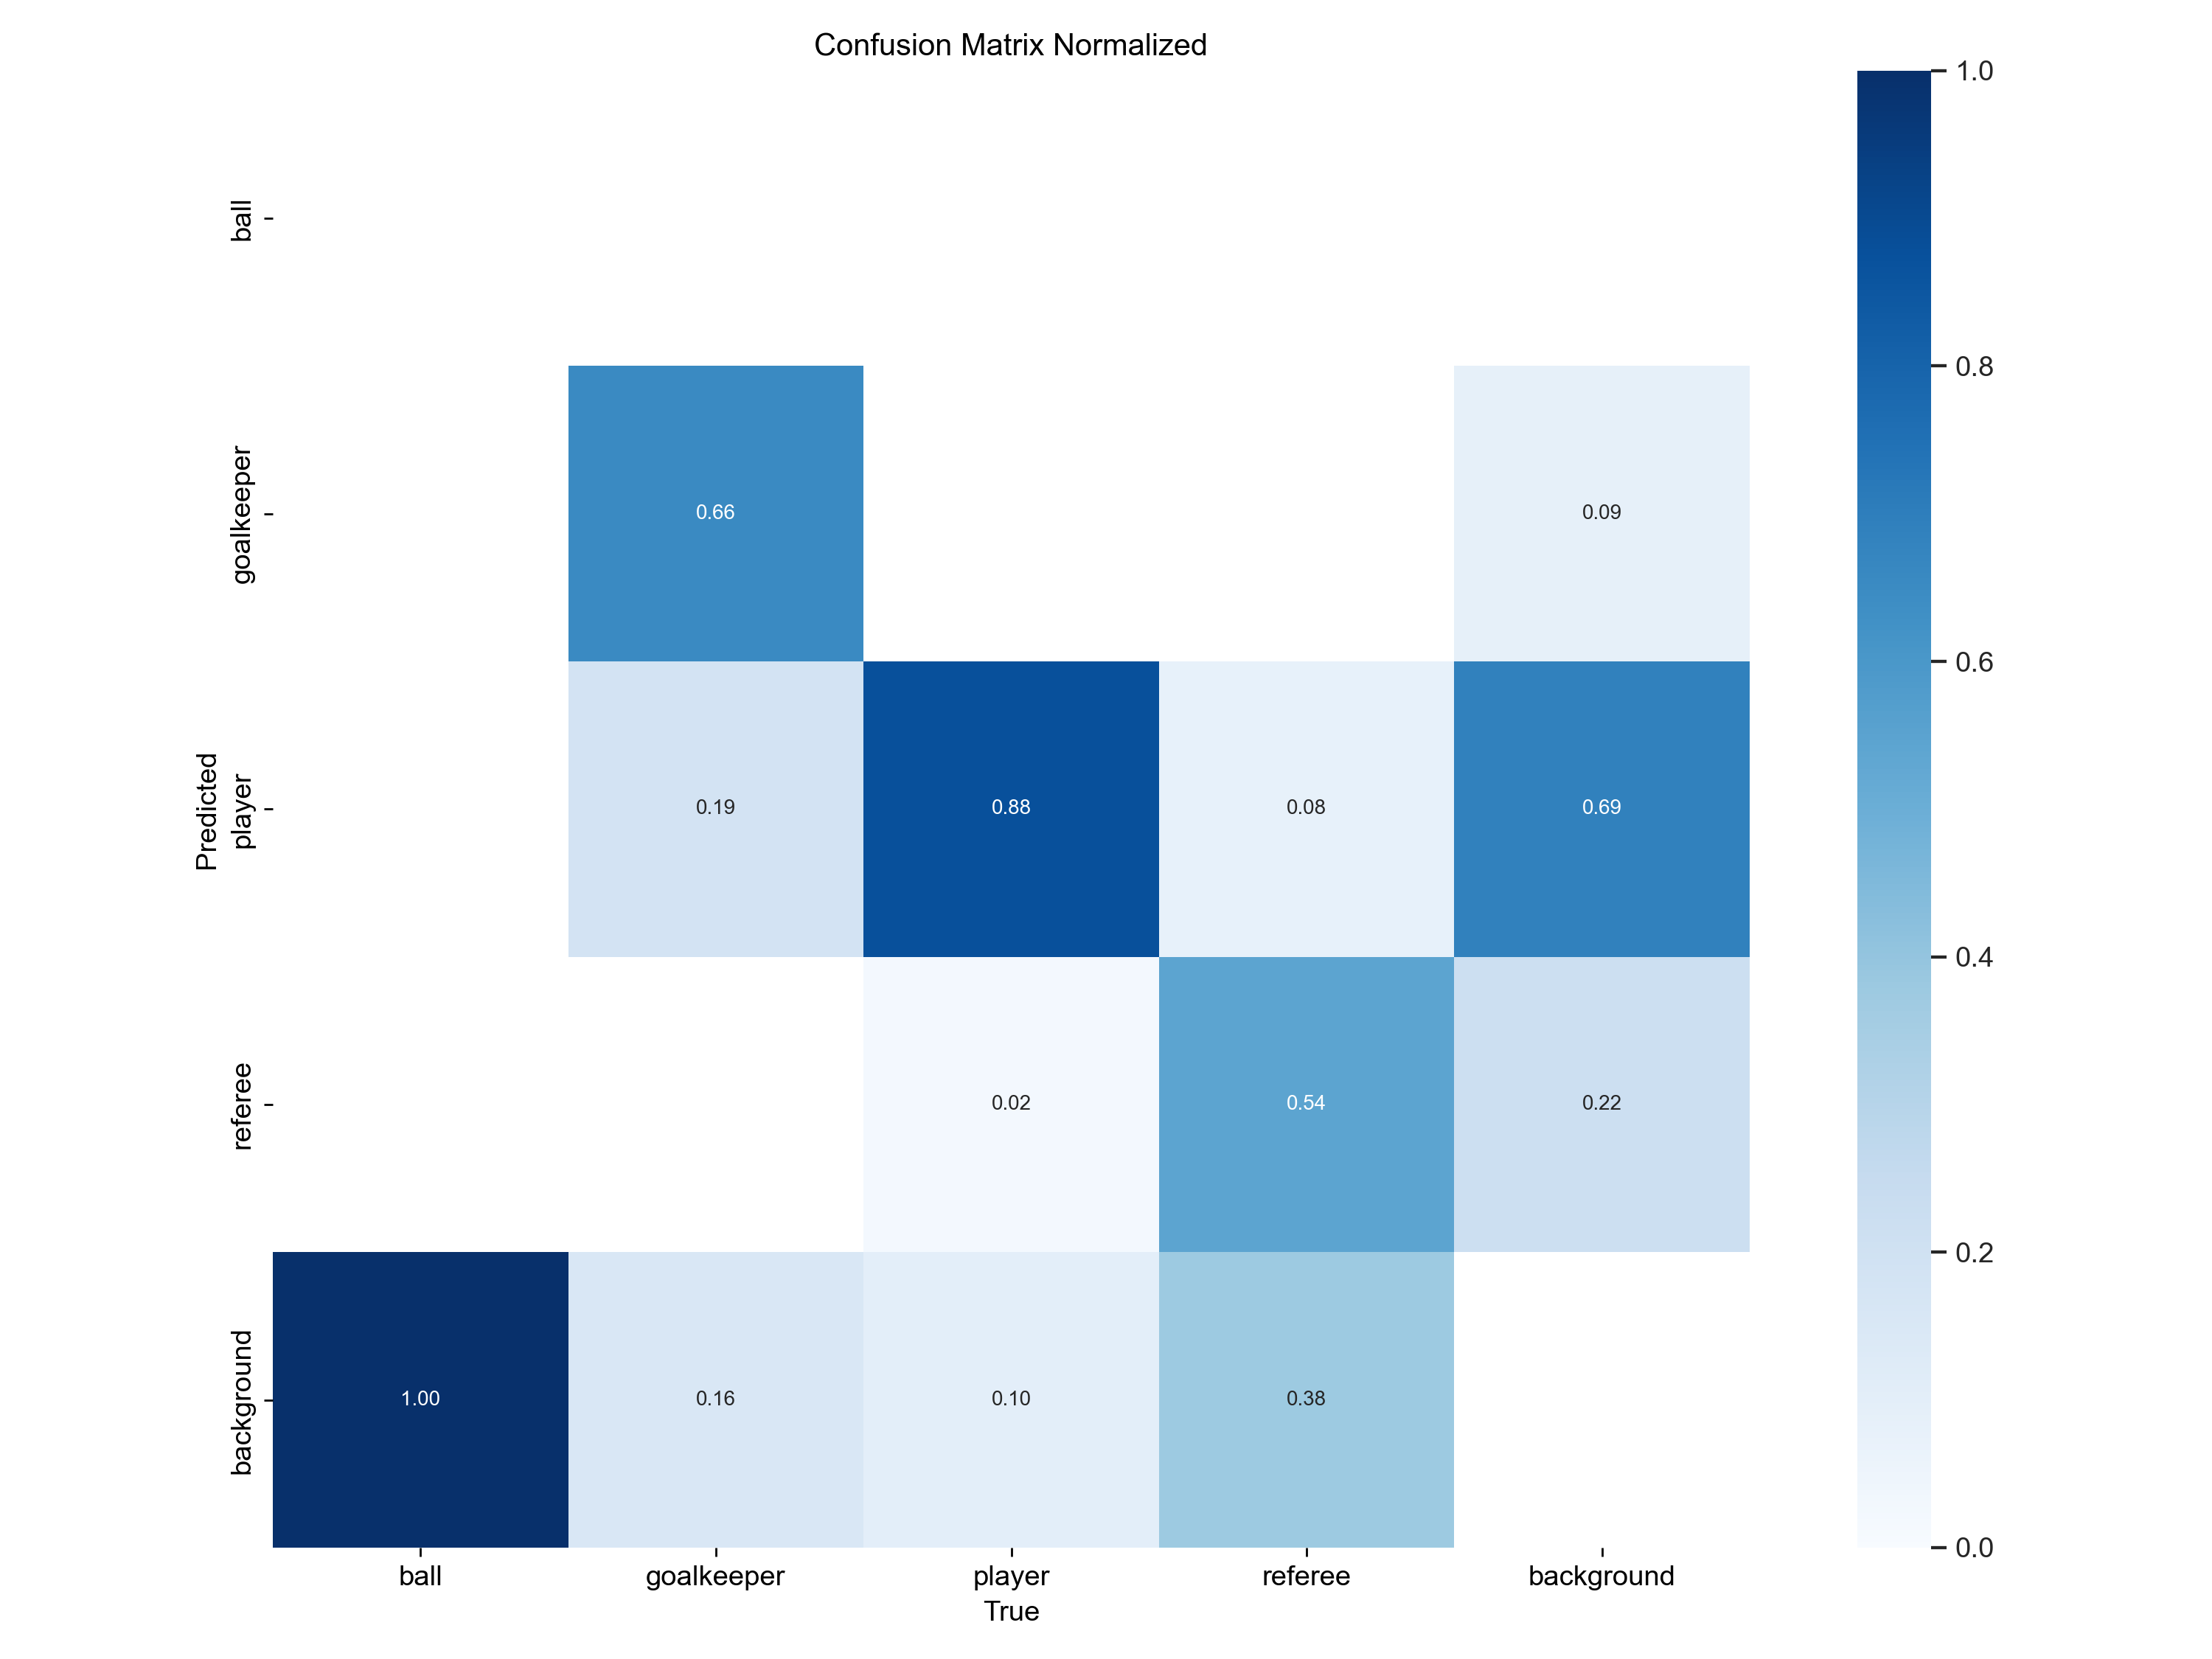

In [6]:
Image(filename=f'confusion_matrix_normalized.png', width=800)

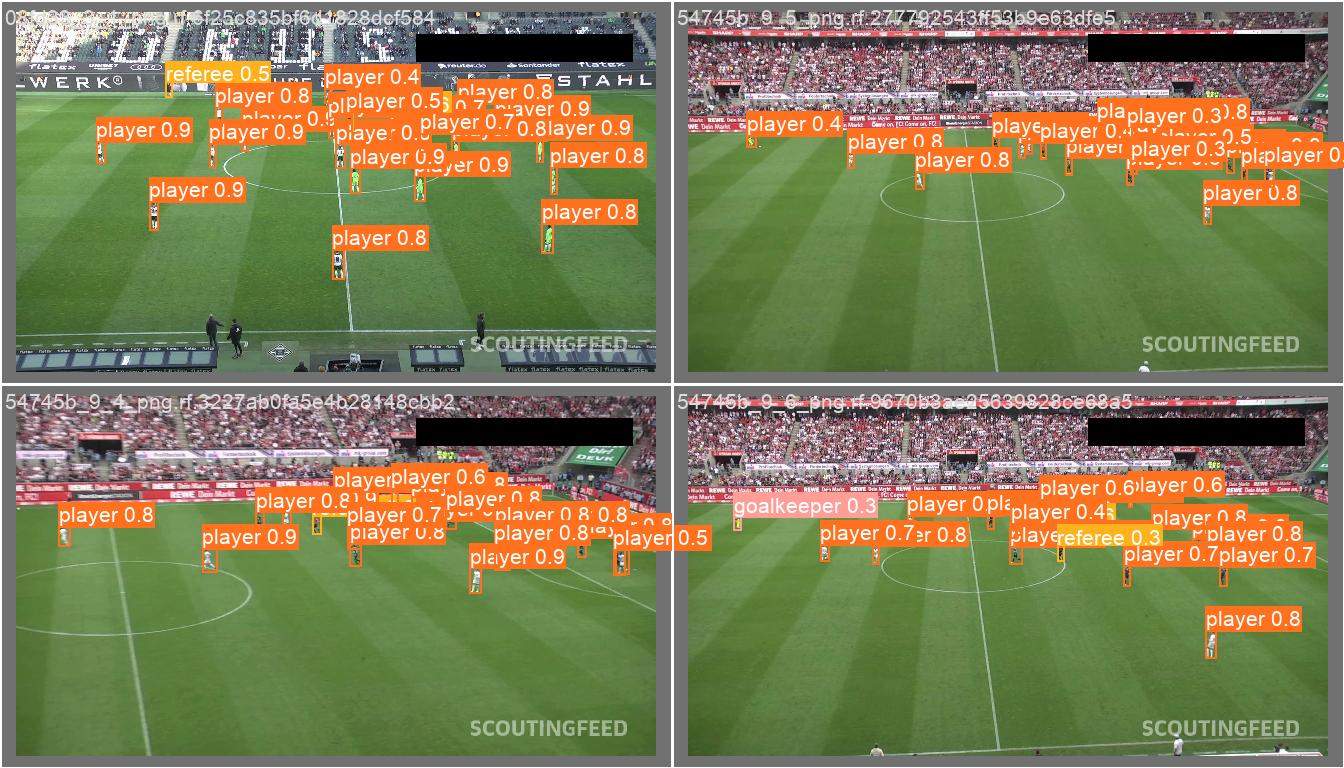

In [7]:
Image(filename=f'val_batch0_pred.jpg', width=800)

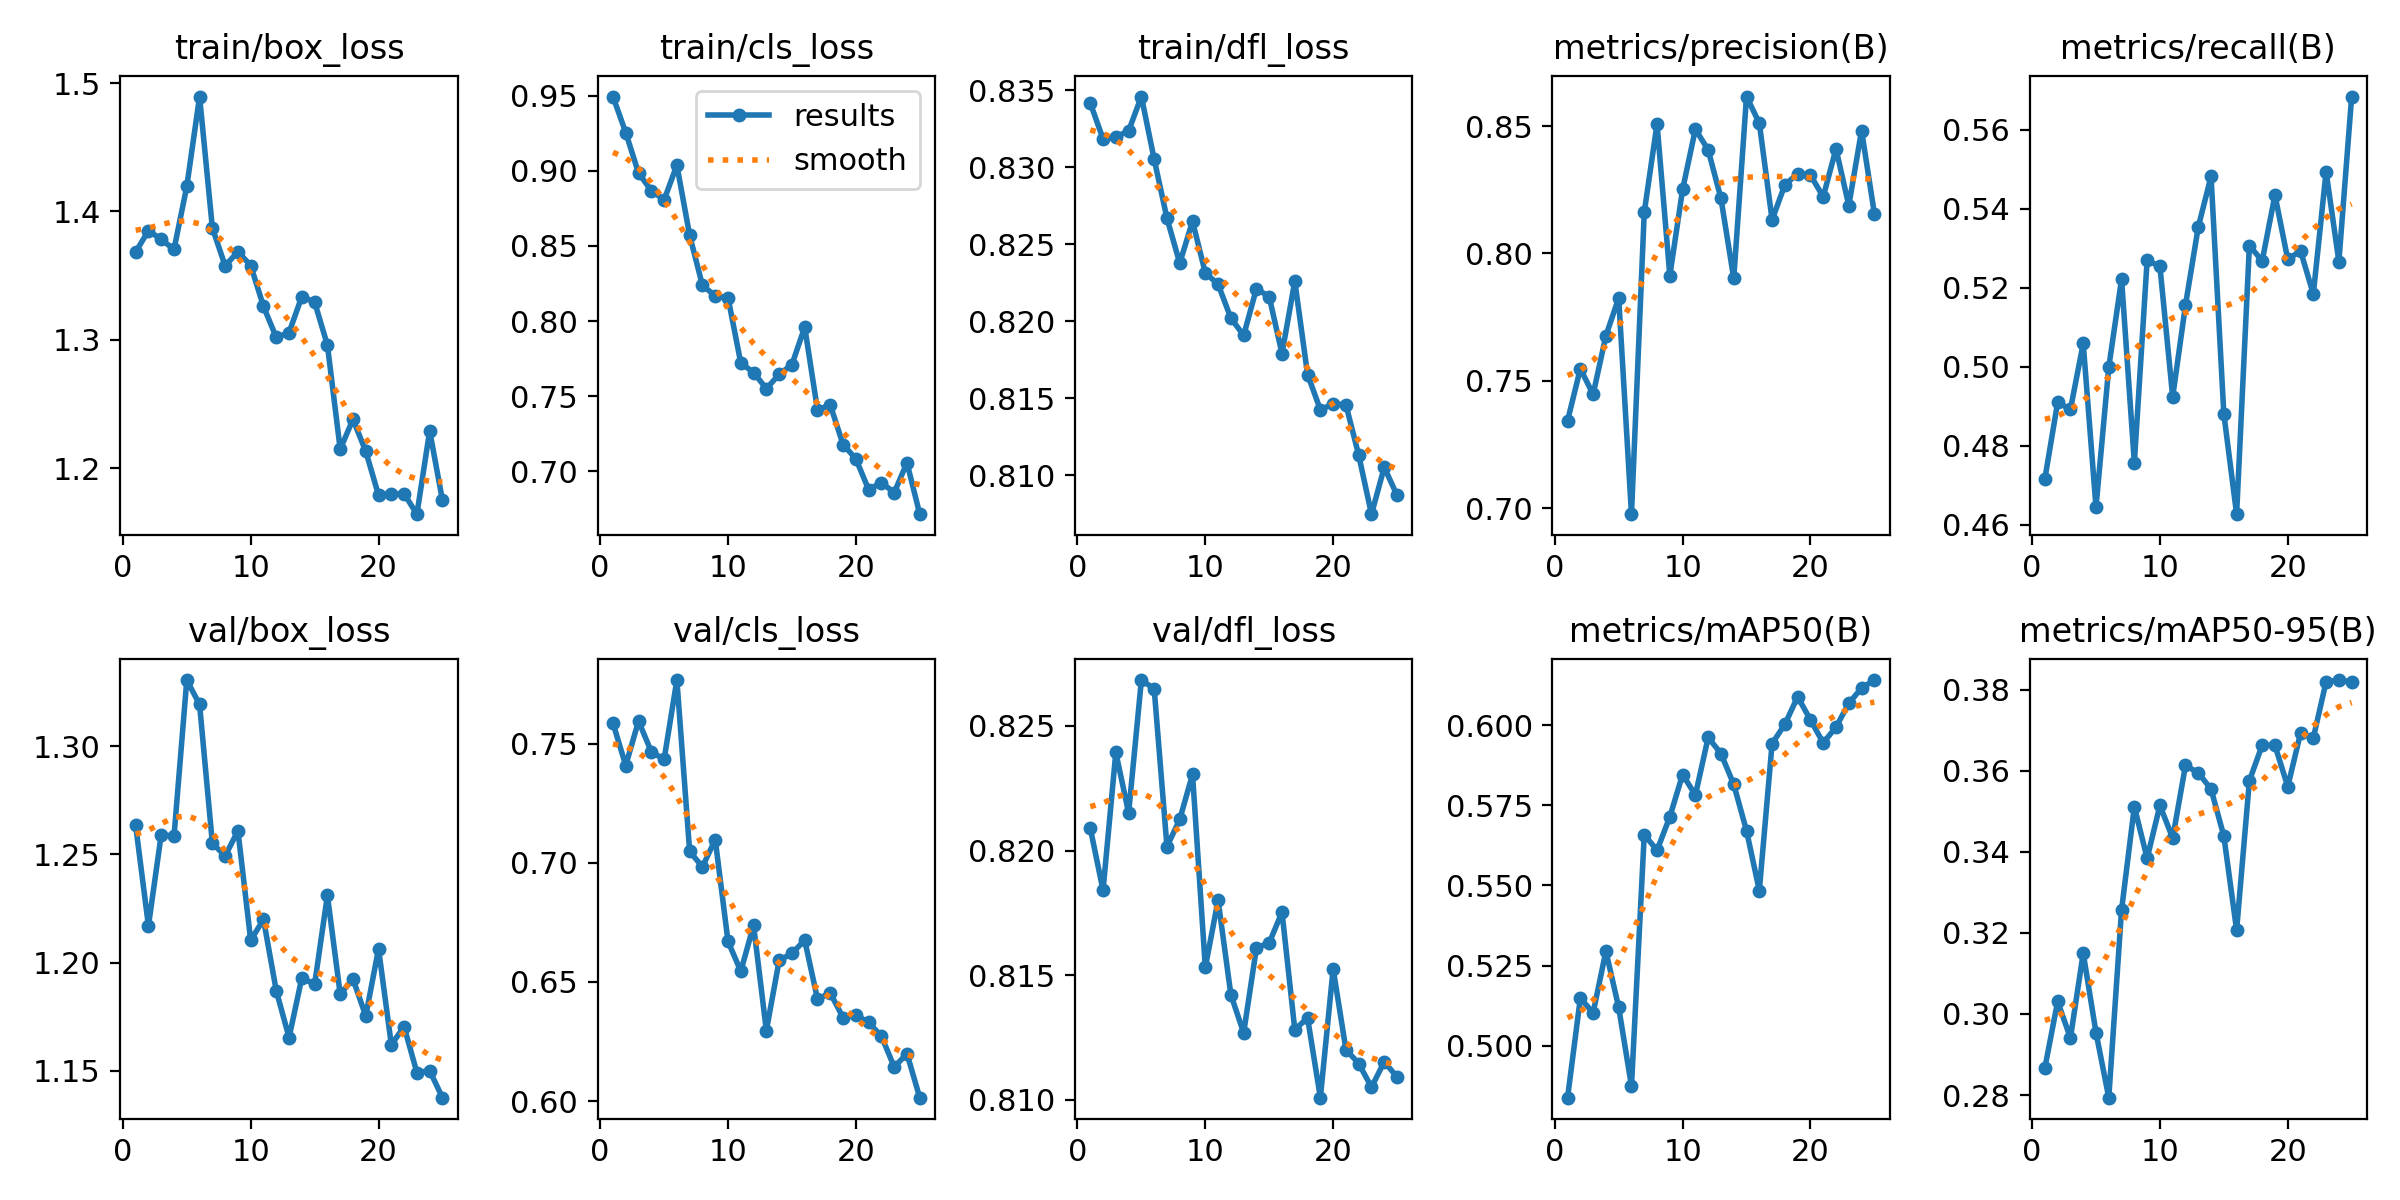

In [8]:
Image(filename=f'results.png', width=800)

# Validate the Model

In [11]:
%cd {HOME}/datasets
metrics = model.val(data='data.yaml')  # no arguments needed, dataset and settings remembered

# Testing the new trained model

In [16]:
#Path to the best model weights
%cd {HOME}/datasets/runs/detect/train7/

In [13]:
# Load best YOLOv8n model
model = YOLO("best.pt").to(device)

In [17]:
%cd {HOME}/datasets

In [ ]:
# Run inference on 'bus.jpg' with arguments
model.predict(data='data.yaml',source='test/images', save=True, conf=0.25)

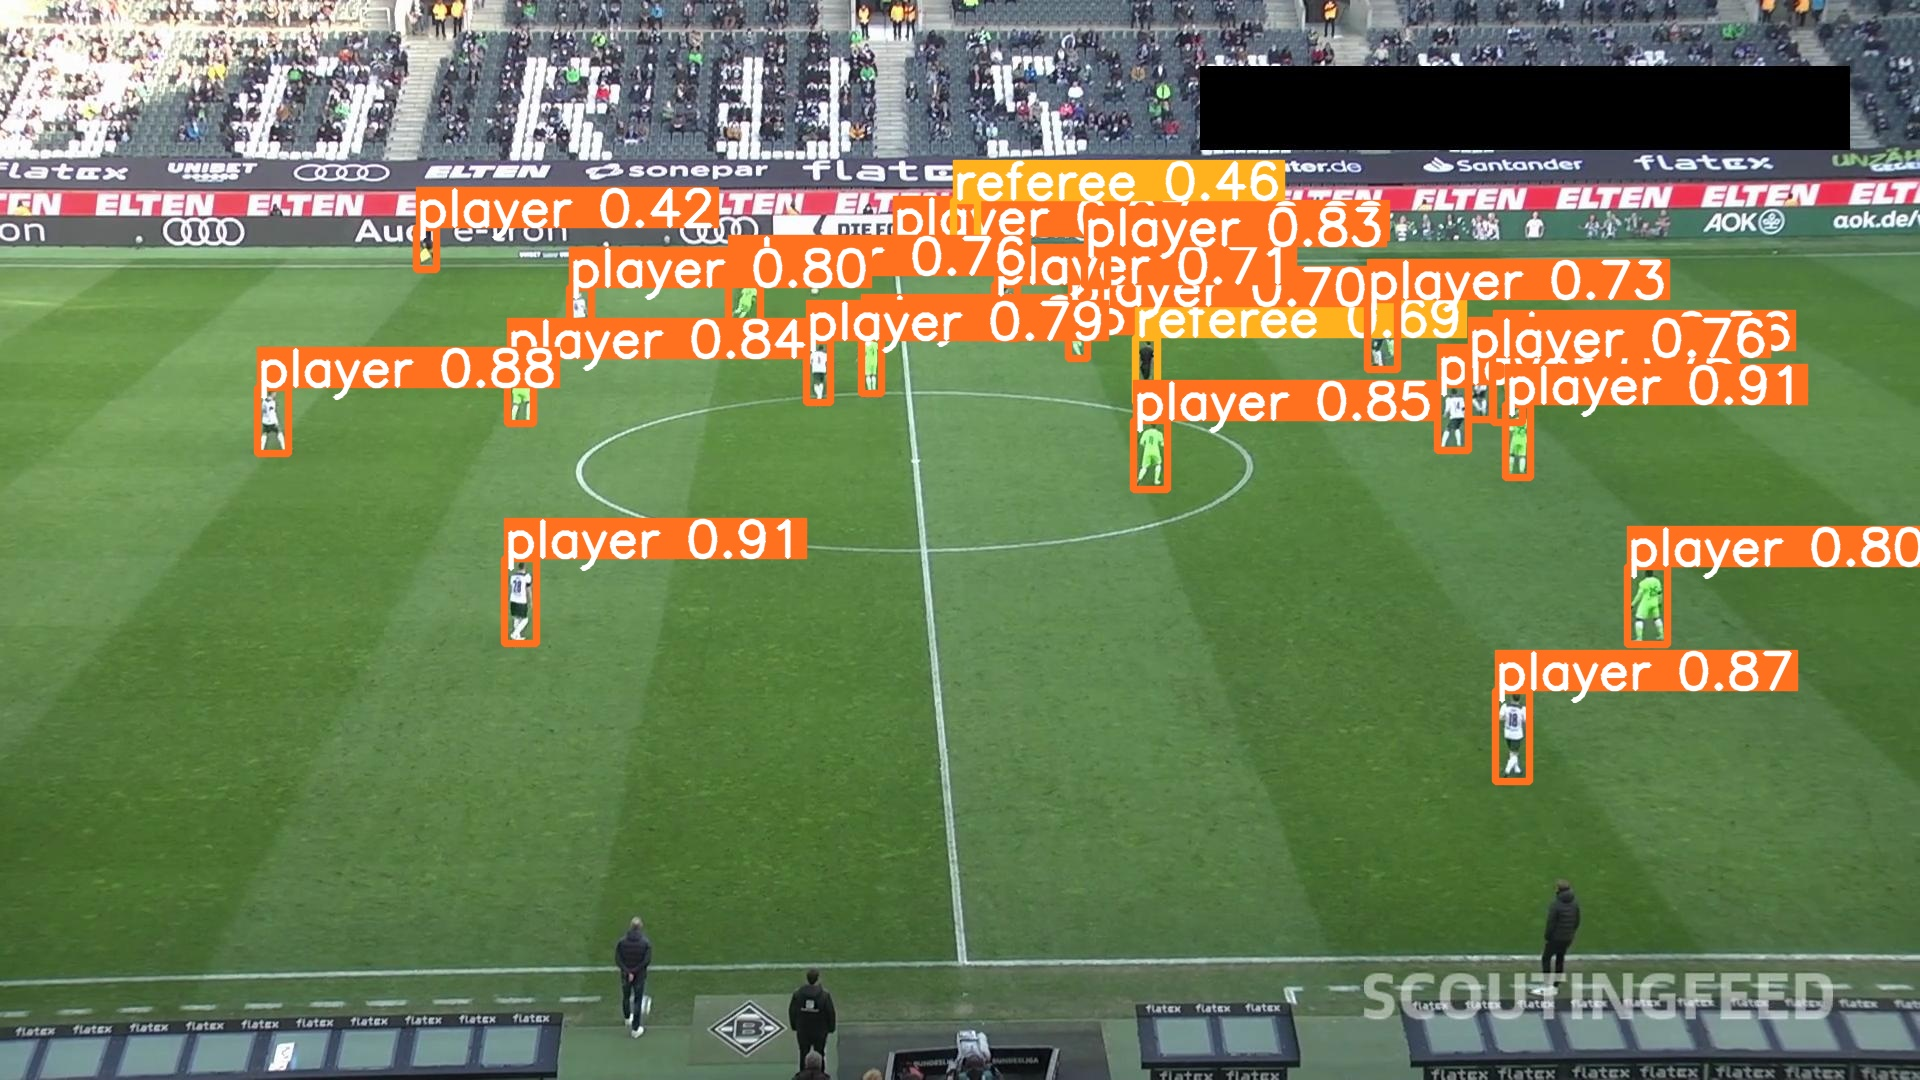

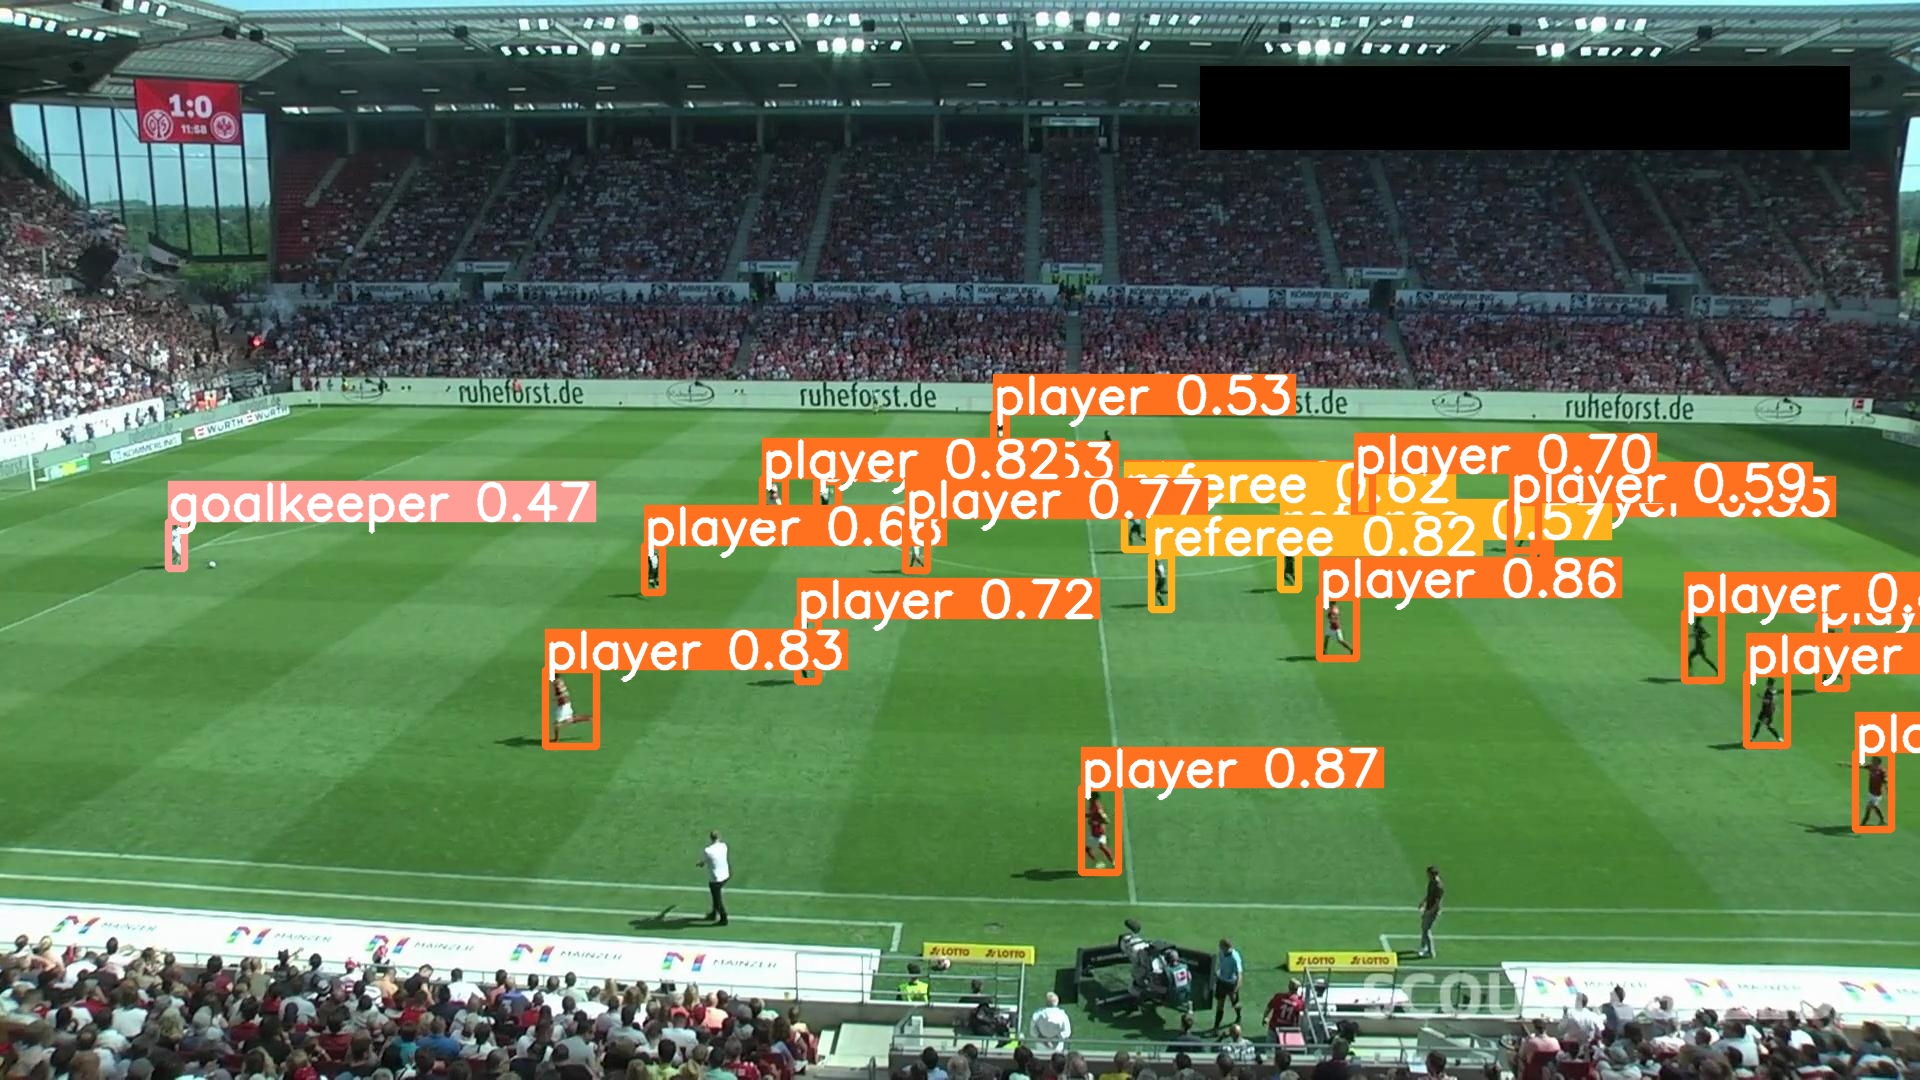

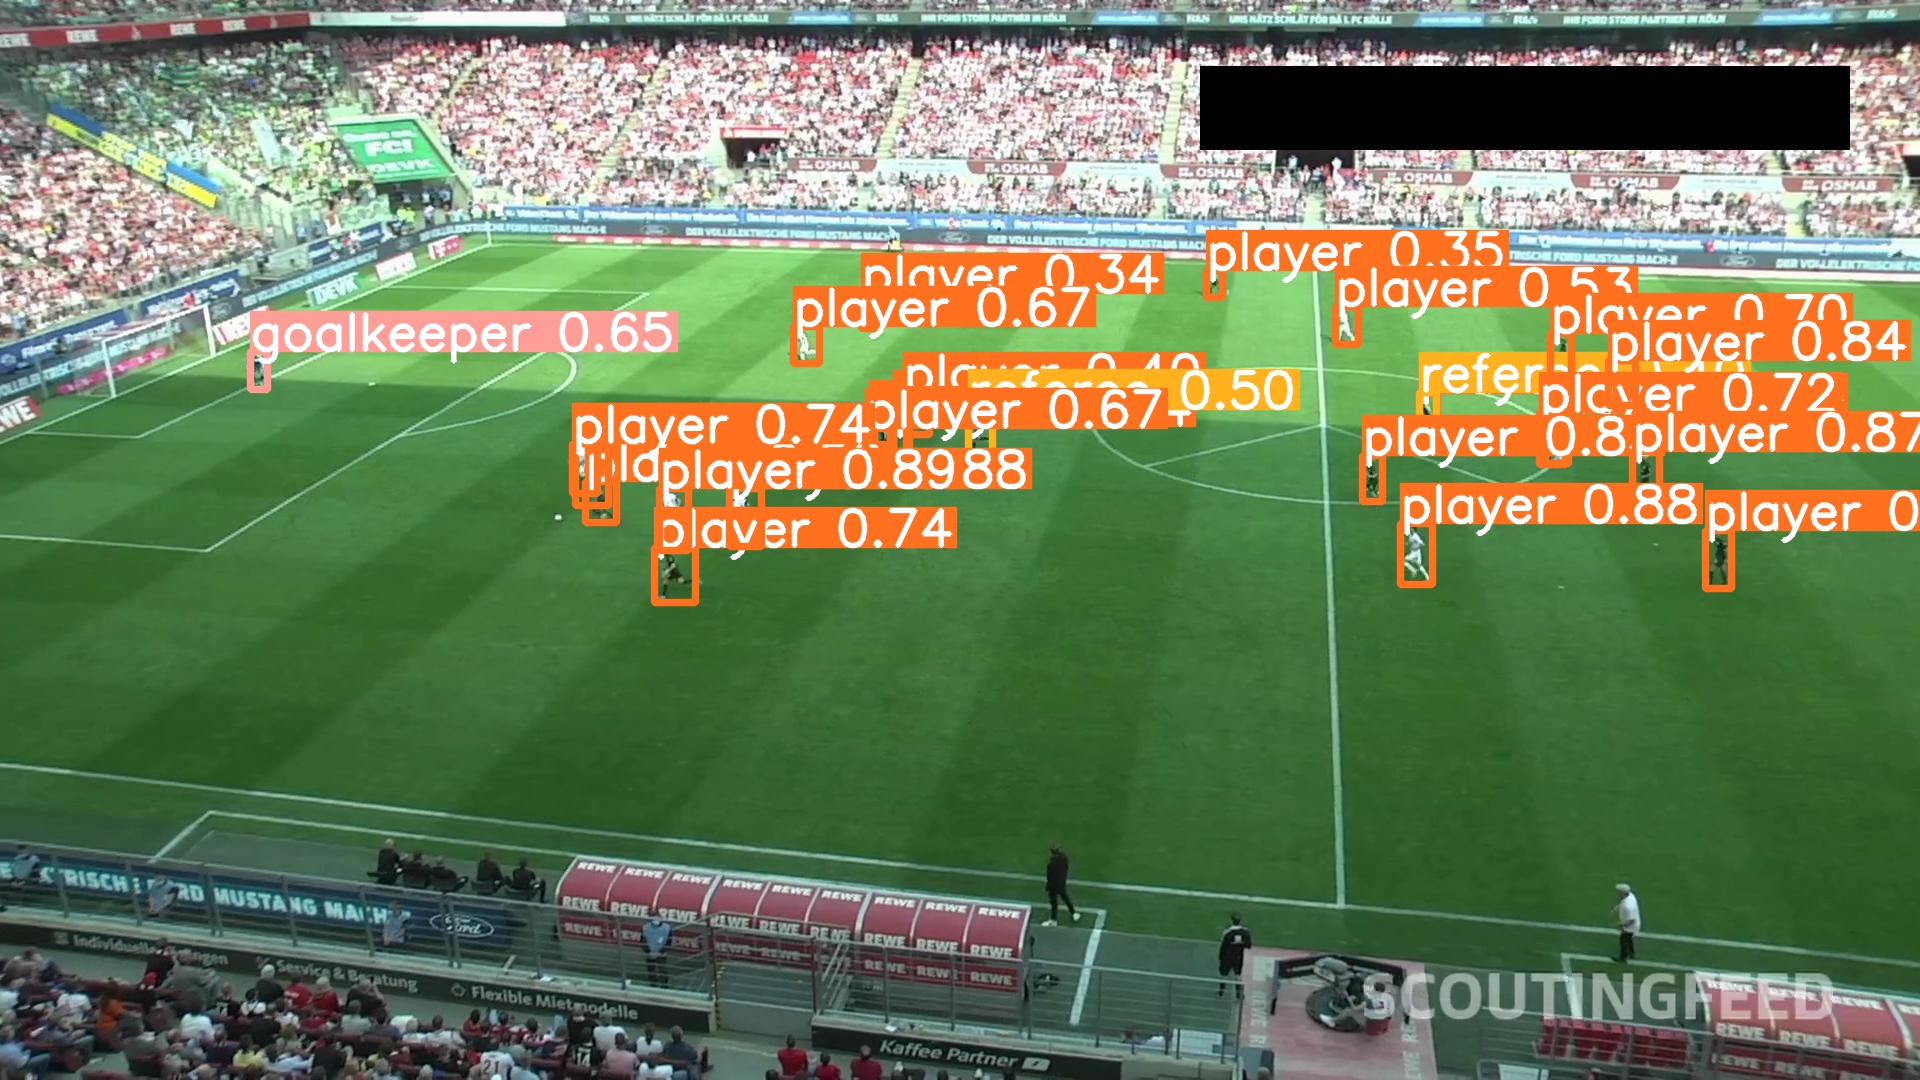

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/datasets/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [18]:
%cd {HOME}

C:\Users\royce\Downloads


# Run inference on a video clip

In [21]:
#path to the video clip
source='sg_korea.mp4'

model.predict(source=source, save=True, conf=0.25)

# Upload model to roboflow

In [ ]:
rf = Roboflow(api_key="API_KEY")
project=rf.project("Project_ID")
version = project.version(1)

In [ ]:
version.deploy("yolov8", "path/to/best/model/weights", "best.pt")